Write your homework based on in class exercise


In [116]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import cvxopt as cvx
import math

**Hint for task1**: You need to reformulate the primal form such that it is a matrix formate and fit in the CVXOPT optimization package. Will have some extra explaination in section.

**Task 1** [10-points]: Given a set of data point use SVM to seperate the points based on label. 

Use hard margin SVM to solve this task

Use this package to solve hard margin optimization problem
https://cvxopt.org/userguide/coneprog.html

Plot out the result including:

1. The original data points
2. the linear boundary of the plot
3. Mark wich points were used as the support vector

Example:
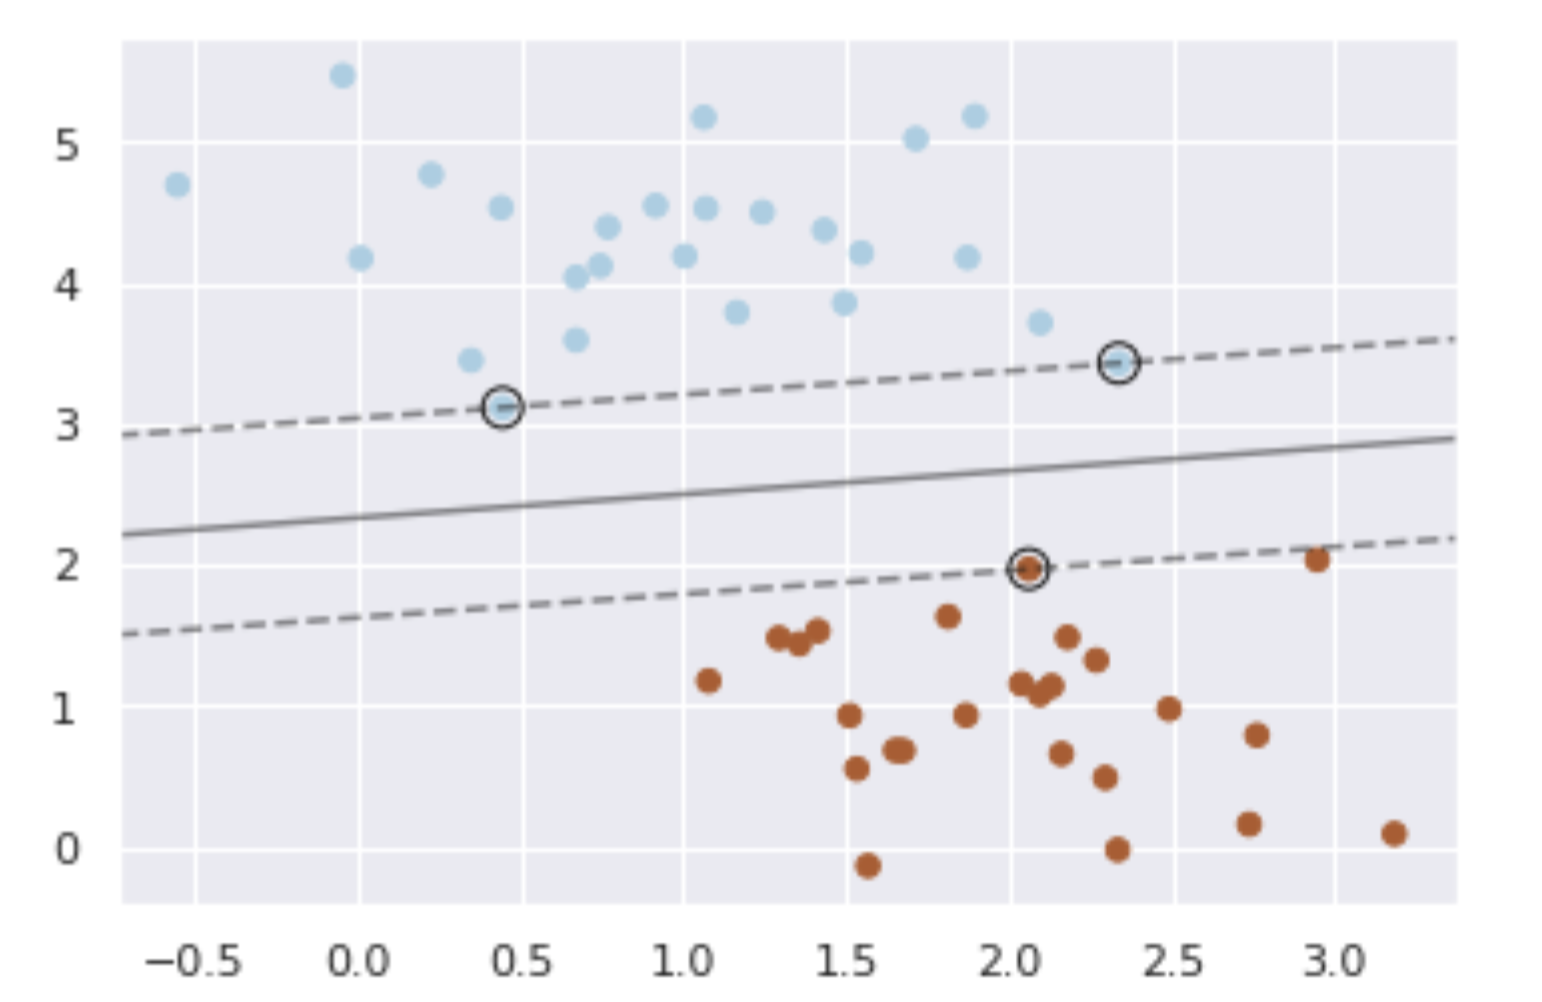

**Extra credit** [5-points]: Can you use gradient descent to approximate this task? If so make it happen :)

     pcost       dcost       gap    pres   dres
 0: -5.4460e+00 -9.4886e+00  1e+02  1e+01  2e+00
 1: -5.1039e+00 -2.7069e+00  2e+01  2e+00  3e-01
 2: -5.7137e-01 -1.3287e+00  8e-01  6e-16  8e-15
 3: -9.2829e-01 -1.0372e+00  1e-01  3e-16  2e-15
 4: -1.0221e+00 -1.0261e+00  4e-03  4e-16  2e-15
 5: -1.0254e+00 -1.0254e+00  4e-05  1e-16  3e-15
 6: -1.0254e+00 -1.0254e+00  4e-07  3e-16  3e-15
Optimal solution found.


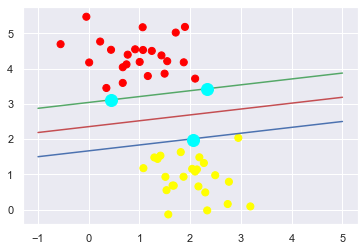

In [119]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

for x in range(y.shape[0]):
    if y[x] == 0:
        y[x] = -1
        
c = [1,1]
h = y



m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvx.matrix(H)
q = cvx.matrix(-np.ones((m, 1)))
G = cvx.matrix(-np.eye(m))
h = cvx.matrix(np.zeros(m))
A = cvx.matrix(y.reshape(1, -1))
b = cvx.matrix(np.zeros(1))



sol = cvx.solvers.qp(P, q, G, h, A, b)

alphas = np.array(sol['x'])

#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b

#Display results
svs = {1.:[], -1.:[]};
for x in range(m):
    if alphas[x]>1e-4:
        svs[y[x][0]].append(X[x])




#CALCULATING OWN INTERCEPT TERM, AND SLOPE

#SV POINT AT  7 :  [2.06156753 1.96918596] X DIFF
#SV POINT AT  18 :  [0.44359863 3.11530945] X SAME
#SV POINT AT  25 :  [2.33812285 3.43116792] X SAME

x_same_1 = []
x_same_2 = []
x_diff_1 = []
for x in svs:
    if len(svs[x]) > 1:
        x_same_1 = svs[x][0]
        x_same_2 = svs[x][1]
    else:
        x_diff_1 = svs[x][0]
        

slope = (x_same_1[1]-x_same_2[1])/(x_same_1[0]-x_same_2[0])


#val 1: adjusted y value, following the slope going destination - start x units forward
val1 = slope*(x_diff_1[0]-x_same_1[0])
val2 = x_same_1[0] + val1
val3 = (val2 + x_diff_1[1])
val4 = slope*(0-x_diff_1[1])
val5 = val3 + val4
#need to get intercept + slope * x dist to any point - y dist to point


intercept = val5

offset = intercept + slope * x_same_1[0] - x_same_1[1]


x_space = np.linspace(-1,5,100)
line_try2 = x_space*slope
line_try2 += intercept
line_try3 = x_space*slope
line_try3 += intercept + offset
line_try4 = x_space*slope
line_try4 += intercept- offset
plt.plot(x_space, line_try2, '-r')
plt.plot(x_space, line_try3, '-b')
plt.plot(x_space, line_try4, '-g')


plt.plot([x_same_1[0],x_same_2[0],x_diff_1[0]], [x_same_1[1],x_same_2[1],x_diff_1[1]], 'ro', color = 'cyan', markersize = 12)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()
#the dots marked with cyan were the support vectors

**Task 2** [20-points]: Given a set of data point which is [non-linear separable] use SVM to seperate the points based on label. 

Use Soft margin SVM to solve this task, tune the soft margin parameters and report the accuracy. 

Plot out the result for each SVM you build including: 

1. The original data points
2. the linear boundary of the plot
3. Mark wich points were used as the support vector

Extra credit[5-points]: Use Matrix multiplication when solve this task instead of using for loop to do element wise calculation. 



     pcost       dcost       gap    pres   dres
 0: -1.1736e+02 -3.5106e+03  8e+03  6e-01  7e-14
 1: -9.4246e+01 -9.8936e+02  1e+03  4e-02  5e-14
 2: -1.1528e+02 -2.5410e+02  1e+02  5e-03  6e-14
 3: -1.4353e+02 -2.0818e+02  7e+01  2e-03  6e-14
 4: -1.5350e+02 -1.7403e+02  2e+01  5e-04  7e-14
 5: -1.5949e+02 -1.7071e+02  1e+01  1e-04  6e-14
 6: -1.6340e+02 -1.6423e+02  8e-01  7e-06  7e-14
 7: -1.6361e+02 -1.6396e+02  4e-01  3e-06  8e-14
 8: -1.6372e+02 -1.6376e+02  4e-02  2e-08  7e-14
 9: -1.6374e+02 -1.6374e+02  4e-04  2e-10  6e-14
10: -1.6374e+02 -1.6374e+02  4e-06  2e-12  5e-14
Optimal solution found.


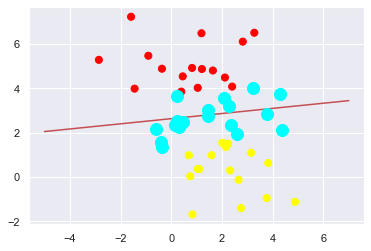

In [122]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for x in range(y.shape[0]):
    if y[x] == 0:
        y[x] = -1

C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvx.matrix(H)
q = cvx.matrix(-np.ones((m, 1)))
G = cvx.matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvx.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvx.matrix(y.reshape(1, -1))
b = cvx.matrix(np.zeros(1))

#Run solver
sol = cvx.solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results

x_space = np.linspace(-5,7,100)

slope2 = -w[0]/w[1]
intercept = -b[2]/w[1]

mispredictions = 0
for x in range(X.shape[0]):
    pred = math.copysign(1, ((slope2*X[x][0] + intercept)-X[x][1]))
    if(y[x] != pred):
        mispredictions += 1
        
line = x_space*slope2
line +=intercept

plt.plot(x_space, line, '-r')

for j in range(m):
    if alphas[j]>1e-4:
        plt.plot(X[j][0], X[j][1],  'ro', color = 'cyan', markersize = 12)

**Task 3** Neural Network [20 Points] 

Preprocess data [5 Points] + Train baseline model [10 Points] + build a better one [5 Points] = [20 Points] 

Build a nerual network for image classification on mnist

In [123]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


Step 1: Load Mnist dataset from keras and use plt package to show one of the images in the dataset

In [124]:
# Helper function for image show
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

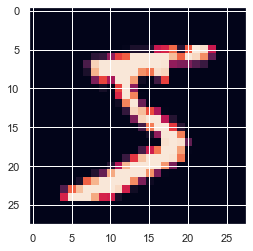

In [126]:
# Your code
# Hint: use keras.datasets for dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
#print(x[0][1])
#print(x[0][0][0].shape)
j = train_data[0][0]
X_show = train_data[0]
plt.imshow(X_show)

Step 2: Normalize all the values of each pixel in the image from [0,255] to [0,1]

Print the min and max value of the data after the normalization.

In [127]:
# Your code
# Hint: Don't use for loop and process each pixel individually
X_numpy = np.array(X_show)
train_normalized = np.array(train_data)
test_normalized = np.array(test_data)

train_normalized = np.divide(train_normalized, 255)
test_normalized = np.divide(test_normalized, 255)


Step 3: Reshape the input image

Now you you suppose to have training/testing data tensor with the size of [#images, 28, 28]. However this assignment is asking to use multilayer perception neural network, which doesn't take 2D images. Faltten the image using **reshape** function such that both training and testing data will have the size of [#images, 784]. **Note**: 28*28 = 784

Print the shape of the data after reshapping


Note: the provided code use ficticious image and labels, replace it with your data

In [128]:
# Your code
#print(X_normalized)
### YOUR CODE HERE ###

train_images = np.array(train_normalized)
train_images = train_images.reshape(60000, 784)
train_labels = np.array(train_labels)
test_images = np.array(test_normalized)
test_images = test_images.reshape(10000, 784)
test_labels = np.array(test_labels)

Step 4: Create Dataframe for both training and testing data. 



In [129]:
# In order to make this task a bit more interesting, we add some noise to the input image :)
noise_level = 0.3
train_images = train_images*(1-noise_level) + np.random.rand(60000, 784)*noise_level
test_images  = test_images *(1-noise_level) + np.random.rand(10000, 784)*noise_level



# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,...,z775,z776,z777,z778,z779,z780,z781,z782,z783,label
0,0.160021,0.261875,0.023360,0.275764,0.202414,0.221122,0.120323,0.133637,0.076235,0.064699,...,0.097582,0.106409,0.181095,0.165813,0.197576,0.079794,0.267165,0.003755,0.150459,5
1,0.238631,0.062761,0.098060,0.034275,0.216701,0.146600,0.289139,0.077040,0.241712,0.167712,...,0.118215,0.219563,0.265545,0.003358,0.188822,0.103591,0.011771,0.259675,0.123751,0
2,0.142126,0.279199,0.281944,0.030692,0.032335,0.028890,0.133148,0.059946,0.271985,0.011629,...,0.000416,0.096761,0.265052,0.156512,0.171202,0.198516,0.207161,0.017246,0.136480,4
3,0.147816,0.164516,0.207063,0.112179,0.240648,0.138770,0.291055,0.178423,0.258845,0.077324,...,0.238852,0.087351,0.007597,0.188233,0.035153,0.091162,0.189874,0.194661,0.185941,1
4,0.146167,0.033295,0.001500,0.043176,0.145801,0.206309,0.113354,0.097270,0.118813,0.294929,...,0.073176,0.158951,0.208870,0.220677,0.099183,0.160825,0.271302,0.010862,0.216145,9


In [130]:
# Build the one for testing as well :)
# Your code:
img_data_2 = {f"z{i}":test_images[:,i] for i in range(784)}
img_data_2["label"] = test_labels
pd.DataFrame(img_data_2)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,...,z775,z776,z777,z778,z779,z780,z781,z782,z783,label
0,0.160021,0.261875,0.023360,0.275764,0.202414,0.221122,0.120323,0.133637,0.076235,0.064699,...,0.097582,0.106409,0.181095,0.165813,0.197576,0.079794,0.267165,0.003755,0.150459,5
1,0.238631,0.062761,0.098060,0.034275,0.216701,0.146600,0.289139,0.077040,0.241712,0.167712,...,0.118215,0.219563,0.265545,0.003358,0.188822,0.103591,0.011771,0.259675,0.123751,0
2,0.142126,0.279199,0.281944,0.030692,0.032335,0.028890,0.133148,0.059946,0.271985,0.011629,...,0.000416,0.096761,0.265052,0.156512,0.171202,0.198516,0.207161,0.017246,0.136480,4
3,0.147816,0.164516,0.207063,0.112179,0.240648,0.138770,0.291055,0.178423,0.258845,0.077324,...,0.238852,0.087351,0.007597,0.188233,0.035153,0.091162,0.189874,0.194661,0.185941,1
4,0.146167,0.033295,0.001500,0.043176,0.145801,0.206309,0.113354,0.097270,0.118813,0.294929,...,0.073176,0.158951,0.208870,0.220677,0.099183,0.160825,0.271302,0.010862,0.216145,9


Step 5: Build nerual network

Build a baseline nueral network including only hidden layer dense layer with width of 5, use relu as the activateion function. 

Use Adam for optimization with learning rate of 0.001

Note that: we are now doint classification of 10 different classes. Width of the output layer should be 10, and use sigmoid. 

In [131]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer
from keras.models import Sequential

# DEFINE YOUR MODEL HERE
### YOUR CODE HERE ###

def build_model1():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 5, input_dim = 784, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')])
    return model

model = build_model1()
optim = Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

In [132]:
# Show a summary of your model
model.summary()
#model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Shuffle the data
def get_data_subset(df, shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    
    data = df.filter(regex=("z[0-9]+")).values
    labels = df["label"].values
    if shuffle:
        np.random.seed(shuffle_seed)
        np.random.shuffle(data)
        np.random.seed(shuffle_seed)
        np.random.shuffle(labels)
    return data, labels.reshape(-1,1)
    
new_X, y = get_data_subset(df_img_train, False)

Use One hot encode for y

In [134]:
from sklearn.preprocessing import OneHotEncoder
# Your code
j = OneHotEncoder()
y_enc= y
j.fit(y_enc)
y_enc_2 = j.transform(y_enc).toarray()
y_enc = y_enc_2

Training time :)

In [135]:
hist = model.fit(new_X, y_enc,
                    epochs = 50, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/50
94/94 [==============================] - 2s 6ms/step - loss: 1.9798 - accuracy: 0.2701 - val_loss: 1.6582 - val_accuracy: 0.4274
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 1.4412 - accuracy: 0.5287 - val_loss: 1.1708 - val_accuracy: 0.6444
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.6775 - val_loss: 0.9267 - val_accuracy: 0.7297
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.8961 - accuracy: 0.7271 - val_loss: 0.8050 - val_accuracy: 0.7588
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.8012 - accuracy: 0.7544 - val_loss: 0.7334 - val_accuracy: 0.7751
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.7412 - accuracy: 0.7741 - val_loss: 0.6885 - val_accuracy: 0.7883
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.7878 - val_loss: 0.6477 - val_accuracy: 0.8029
Epoch 8/50
94/94 [==

In [136]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

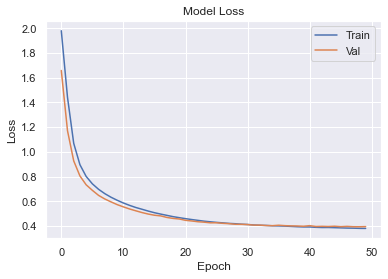

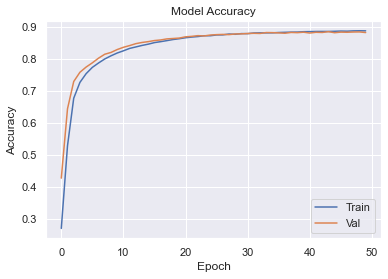

In [137]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

**Final step: Build a better one** Don't forget this worth 5 points

Note that this is a simple task, but we only achieve 0.8314 accuracy on the validation set. Try finding out what is wrong with the baseline method, beat it! Your goal is to get accuracy at around 95.

In [138]:
def build_model1():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 50, input_dim = 784, activation='relu'),
    tf.keras.layers.Dense(units = 50, activation='relu'),
    tf.keras.layers.Dense(units = 50, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')])
    return model

model = build_model1()
optim = Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

Epoch 1/50
94/94 [==============================] - 1s 11ms/step - loss: 1.5628 - accuracy: 0.5821 - val_loss: 0.8384 - val_accuracy: 0.8232
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 0.6489 - accuracy: 0.8482 - val_loss: 0.4915 - val_accuracy: 0.8772
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8816 - val_loss: 0.3895 - val_accuracy: 0.8942
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.8975 - val_loss: 0.3400 - val_accuracy: 0.9023
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.9066 - val_loss: 0.3098 - val_accuracy: 0.9100
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.9132 - val_loss: 0.2878 - val_accuracy: 0.9150
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9174 - val_loss: 0.2666 - val_accuracy: 0.9222
Epoch 8/50
94/94 [=

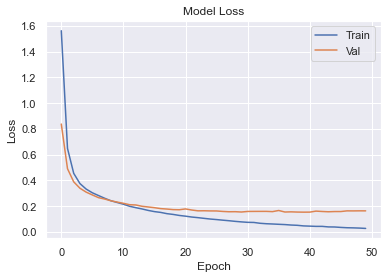

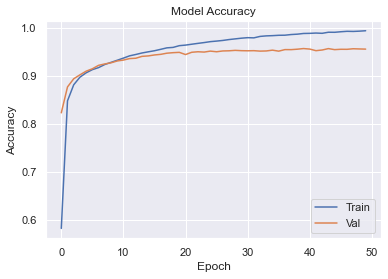

In [139]:
hist = model.fit(new_X, y_enc,
                    epochs = 50, 
                   batch_size = 512,
                    validation_split = 0.2,
                    verbose = 1)

# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)